In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from alibi.explainers.permutation_importance import PermutationImportance, plot_permutation_importance
from sklearn.metrics import accuracy_score, f1_score

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
X, y = make_classification(n_samples=1000, 
                           n_features=10, 
                           n_informative=3,
                           n_redundant=0,
                           n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = LogisticRegression().fit(X_train, y_train)

In [133]:
explainer = PermutationImportance(predictor=clf.predict, verbose=True)

In [134]:
def accuracy(y_true, y_pred, sample_weight):
    return 1 - accuracy_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

def f1(y_true, y_pred, sample_weight):
    return 1 - f1_score(y_true=y_true, y_pred=y_pred, sample_weight=sample_weight)

In [135]:
exp = explainer.explain(X=X_test,
                        y=y_test,
                        loss_fns={'accuracy': accuracy, "f1": f1},
                        n_repeats=100,
                        method='estimate')

100%|██████████| 10/10 [00:00<00:00, 17.45it/s]


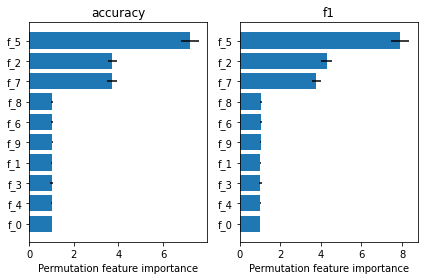

In [136]:
axes = plot_permutation_importance(exp=exp)

In [137]:
clf.score(X_test, y_test)

0.93

In [139]:
X_train_red = X_train[:, [5, 2, 7]]
X_test_red = X_test[:, [5, 2, 7]]

clf_red = LogisticRegression().fit(X_train_red, y_train)
print(clf_red.score(X_train_red, y_train))
print(clf_red.score(X_test_red, y_test))

0.904
0.928
